In [1]:
import pandas as pd
data = pd.read_csv('chicken_data.csv')

In [2]:
data.head()

Unnamed: 0  temparature
0  2020-01-10 00:00:00          -12
1  2020-01-10 00:15:00           -9
2  2020-01-10 00:30:00          -10
3  2020-01-10 00:45:00           -8
4  2020-01-10 01:00:00          -19

In [3]:
data['datetime'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('datetime')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

temparature
datetime                        
2020-01-10 00:00:00          -12
2020-01-10 00:15:00           -9
2020-01-10 00:30:00          -10
2020-01-10 00:45:00           -8
2020-01-10 01:00:00          -19

In [4]:
data_map = data['temparature'].resample('H').mean()
data_map.head()

datetime
2020-01-10 00:00:00    -9.75
2020-01-10 01:00:00   -20.25
2020-01-10 02:00:00   -17.50
2020-01-10 03:00:00    -7.75
2020-01-10 04:00:00    -9.75
Freq: H, Name: temparature, dtype: float64

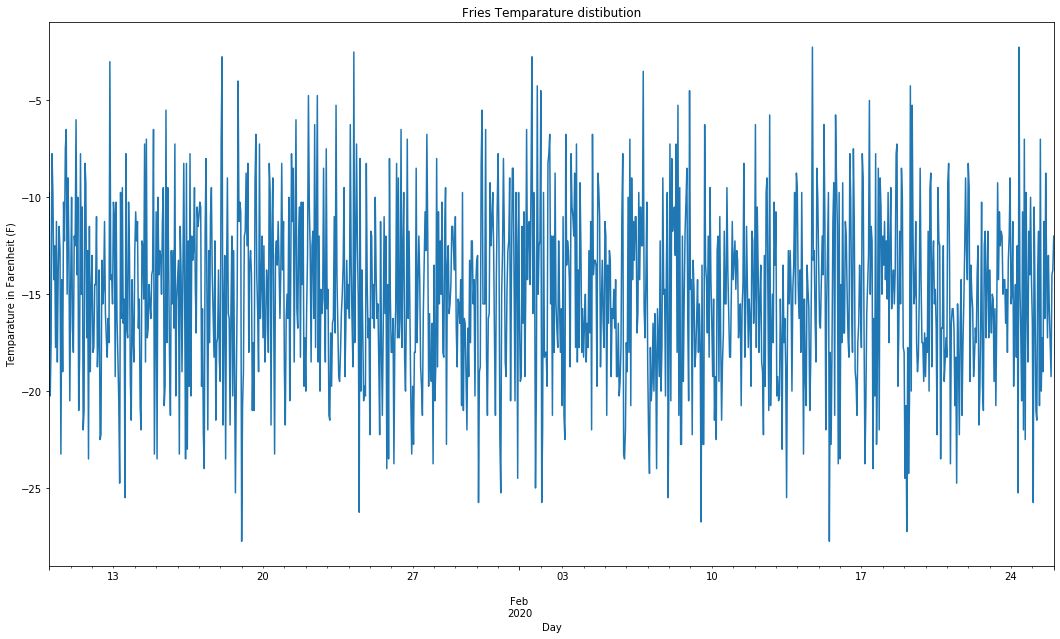

In [5]:
import matplotlib.pyplot as plt
data_map.plot(figsize=(18, 10))
plt.title('Fries Temparature distibution')
plt.xlabel('Day')
plt.ylabel('Temparature in Farenheit (F)')
plt.show()

In [6]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=data_map.index,
                y=data_map,
                name="Temparature",
                line_color='blue',
                opacity=0.8))

fig.update_layout(
    title="Chicken temparature variations past 40 days",
    xaxis_title="Date",
    yaxis_title="Food Temparature",
)

In [7]:
from matplotlib import pyplot as plt
from fbprophet import Prophet

In [8]:
dataframe_map = data
dataframe_map.reset_index(level=0, inplace=True)

In [9]:
dataframe_map = dataframe_map.rename(columns={"datetime":"ds", "temparature":"y"})

In [10]:
mod_prophet = Prophet(interval_width=0.95, yearly_seasonality=True)
mod_prophet.fit(dataframe_map)

In [11]:
future = mod_prophet.make_future_dataframe(periods=2500, freq='30T')
future

ds
0    2020-01-10 00:00:00
1    2020-01-10 00:15:00
2    2020-01-10 00:30:00
3    2020-01-10 00:45:00
4    2020-01-10 01:00:00
...                  ...
7008 2020-04-18 00:00:00
7009 2020-04-18 00:30:00
7010 2020-04-18 01:00:00
7011 2020-04-18 01:30:00
7012 2020-04-18 02:00:00

[7013 rows x 1 columns]

In [12]:
forecast = mod_prophet.predict(future)
#forecast[['ds', 'yhat']].tail(240)

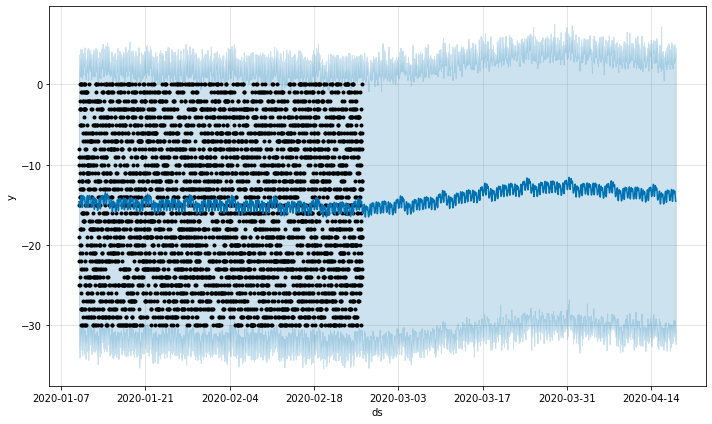

In [13]:
fig1 = mod_prophet.plot(forecast)

In [14]:
data_final = forecast.tail(2500)

In [15]:
data_final.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
4513 2020-02-26 00:30:00 -13.356105  -32.881971    0.939920   -13.356105   
4514 2020-02-26 01:00:00 -13.356322  -32.386478    0.543190   -13.356322   
4515 2020-02-26 01:30:00 -13.356539  -33.987305    1.588517   -13.356539   
4516 2020-02-26 02:00:00 -13.356756  -32.681452    0.536665   -13.356756   
4517 2020-02-26 02:30:00 -13.356973  -34.117468    2.701042   -13.356973   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
4513   -13.356105       -2.275976             -2.275976             -2.275976   
4514   -13.356322       -2.486423             -2.486423             -2.486423   
4515   -13.356539       -2.630053             -2.630053             -2.630053   
4516   -13.356756       -2.699225             -2.699225             -2.699225   
4517   -13.356973       -2.701506             -2.701506             -2.701506   

         daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
4513 -0.408152  ...  0.144850      0.144850      0.144850 -2.012674   
4514 -0.596010  ...  0.121749      0.121749      0.121749 -2.012162   
4515 -0.716960  ...  0.098554      0.098554      0.098554 -2.011647   
4516 -0.763410  ...  0.075315      0.075315      0.075315 -2.011129   
4517 -0.742980  ...  0.052082      0.052082      0.052082 -2.010608   

      yearly_lower  yearly_upper  multiplicative_terms  \
4513     -2.012674     -2.012674                   0.0   
4514     -2.012162     -2.012162                   0.0   
4515     -2.011647     -2.011647                   0.0   
4516     -2.011129     -2.011129                   0.0   
4517     -2.010608     -2.010608                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
4513                         0.0                         0.0 -15.632081  
4514                         0.0                         0.0 -15.842745  
4515                         0.0                         0.0 -15.986592  
4516                         0.0                         0.0 -16.055981  
4517                         0.0                         0.0 -16.058479  

[5 rows x 22 columns]

In [16]:
import plotly.graph_objects as go

In [17]:
# fig = go.Figure([go.Scatter(x=data_final['ds'], y=data_final['yhat'])])
# fig.show()

In [18]:
# data_ready = data_final[['ds','yhat']]
# data_ready

In [19]:
# import plotly.express as px

# fig = px.line(data_ready, x='ds', y='yhat')
# fig.show()

In [20]:
# import plotly.graph_objects as go
# import pandas as pd

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#                 x=data_final['ds'],
#                 y=data_final['yhat'],
#                 name="Actual Temparature",
#                 line_color='green',
#                 opacity=0.8))

# fig.add_trace(go.Scatter(
#                 x=data_final['ds'],
#                 y=data_final['yhat_upper'],
#                 name="High Temparature",
#                 line_color='red',
#                 opacity=0.8))

# fig.add_trace(go.Scatter(
#                 x=data_final['ds'],
#                 y=data_final['yhat_lower'],
#                 name=" Low Temparature",
#                 line_color='blue',
#                 opacity=0.8))
# fig.update_layout(
#     title="Ice cream temparature variations for next 40 days",
#     xaxis_title="Date",
#     yaxis_title="Food Temparature",
# )
# # # Use date string to set xaxis range
# # fig.update_layout(xaxis_range=['2016-07-01','2016-12-31'],
# #                   title_text="Manually Set Date Range")
# fig.show()

In [21]:
def fix_scores(score):
    return score+13
def fix_scores_upper(score):
    return score-13

data_final['yhat_lower'] = data_final['yhat_lower'].apply(fix_scores)
data_final['yhat_upper'] = data_final['yhat_upper'].apply(fix_scores_upper)



C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
data_final.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
4513 2020-02-26 00:30:00 -13.356105  -19.881971  -12.060080   -13.356105   
4514 2020-02-26 01:00:00 -13.356322  -19.386478  -12.456810   -13.356322   
4515 2020-02-26 01:30:00 -13.356539  -20.987305  -11.411483   -13.356539   
4516 2020-02-26 02:00:00 -13.356756  -19.681452  -12.463335   -13.356756   
4517 2020-02-26 02:30:00 -13.356973  -21.117468  -10.298958   -13.356973   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
4513   -13.356105       -2.275976             -2.275976             -2.275976   
4514   -13.356322       -2.486423             -2.486423             -2.486423   
4515   -13.356539       -2.630053             -2.630053             -2.630053   
4516   -13.356756       -2.699225             -2.699225             -2.699225   
4517   -13.356973       -2.701506             -2.701506             -2.701506   

         daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
4513 -0.408152  ...  0.144850      0.144850      0.144850 -2.012674   
4514 -0.596010  ...  0.121749      0.121749      0.121749 -2.012162   
4515 -0.716960  ...  0.098554      0.098554      0.098554 -2.011647   
4516 -0.763410  ...  0.075315      0.075315      0.075315 -2.011129   
4517 -0.742980  ...  0.052082      0.052082      0.052082 -2.010608   

      yearly_lower  yearly_upper  multiplicative_terms  \
4513     -2.012674     -2.012674                   0.0   
4514     -2.012162     -2.012162                   0.0   
4515     -2.011647     -2.011647                   0.0   
4516     -2.011129     -2.011129                   0.0   
4517     -2.010608     -2.010608                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
4513                         0.0                         0.0 -15.632081  
4514                         0.0                         0.0 -15.842745  
4515                         0.0                         0.0 -15.986592  
4516                         0.0                         0.0 -16.055981  
4517                         0.0                         0.0 -16.058479  

[5 rows x 22 columns]

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=data_final['ds'],
                y=data_final['yhat'],
                name="Actual Temparature",
                line_color='green',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=data_final['ds'],
                y=data_final['yhat_upper'],
                name="High Temparature",
                line_color='red',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=data_final['ds'],
                y=data_final['yhat_lower'],
                name=" Low Temparature",
                line_color='blue',
                opacity=0.8))
fig.update_layout(
    title="Chicken temparature variations over next 40 days",
    xaxis_title="Date",
    yaxis_title="Temparature in Farenheit",
)
# # Use date string to set xaxis range
# fig.update_layout(xaxis_range=['2016-07-01','2016-12-31'],
#                   title_text="Manually Set Date Range")
fig.show()